# **Outliers**

In [10]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

import sys
sys.path.append("../")
from src import funciones_outliers as fo

pd.set_option("display.max_columns", None)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
df = pd.read_pickle("../datos/dataframes/df_nonulls_encoded.pkl")
print(df.shape)
df.head()

(4300, 26)


,Attrition,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,Gender_Female,Gender_Male
0,0,0.137225,0.113943,0.166169,51,0.150770,0.151492,6,2,0.167044,1,0.145889,0.127476,131160,1.0,11,0,1.0,0.063158,1,0,0,0.153057,3,1.0,0.0
1,1,0.137225,0.164034,0.177778,31,0.245983,0.157820,10,1,0.167044,1,0.183935,0.253256,41890,0.0,23,1,6.0,0.175817,5,1,4,0.161232,4,1.0,0.0
2,0,0.150179,0.164034,0.309322,32,0.245983,0.157820,17,4,0.126582,4,0.169456,0.127476,193280,1.0,15,3,5.0,0.171053,5,0,3,0.153057,3,0.0,1.0
3,0,0.134909,0.113943,0.143733,38,0.081818,0.157820,2,5,0.167044,3,0.136364,0.127476,83210,3.0,11,3,13.0,0.147399,8,7,5,0.161232,3,0.0,1.0
4,0,0.134909,0.229044,0.143733,32,0.150770,0.157820,10,1,0.160557,1,0.169456,0.253256,23420,4.0,12,2,9.0,0.171053,6,0,4,0.153057,3,0.0,1.0


In [12]:
univariados = fo.GestionOutliersUnivariados(df)

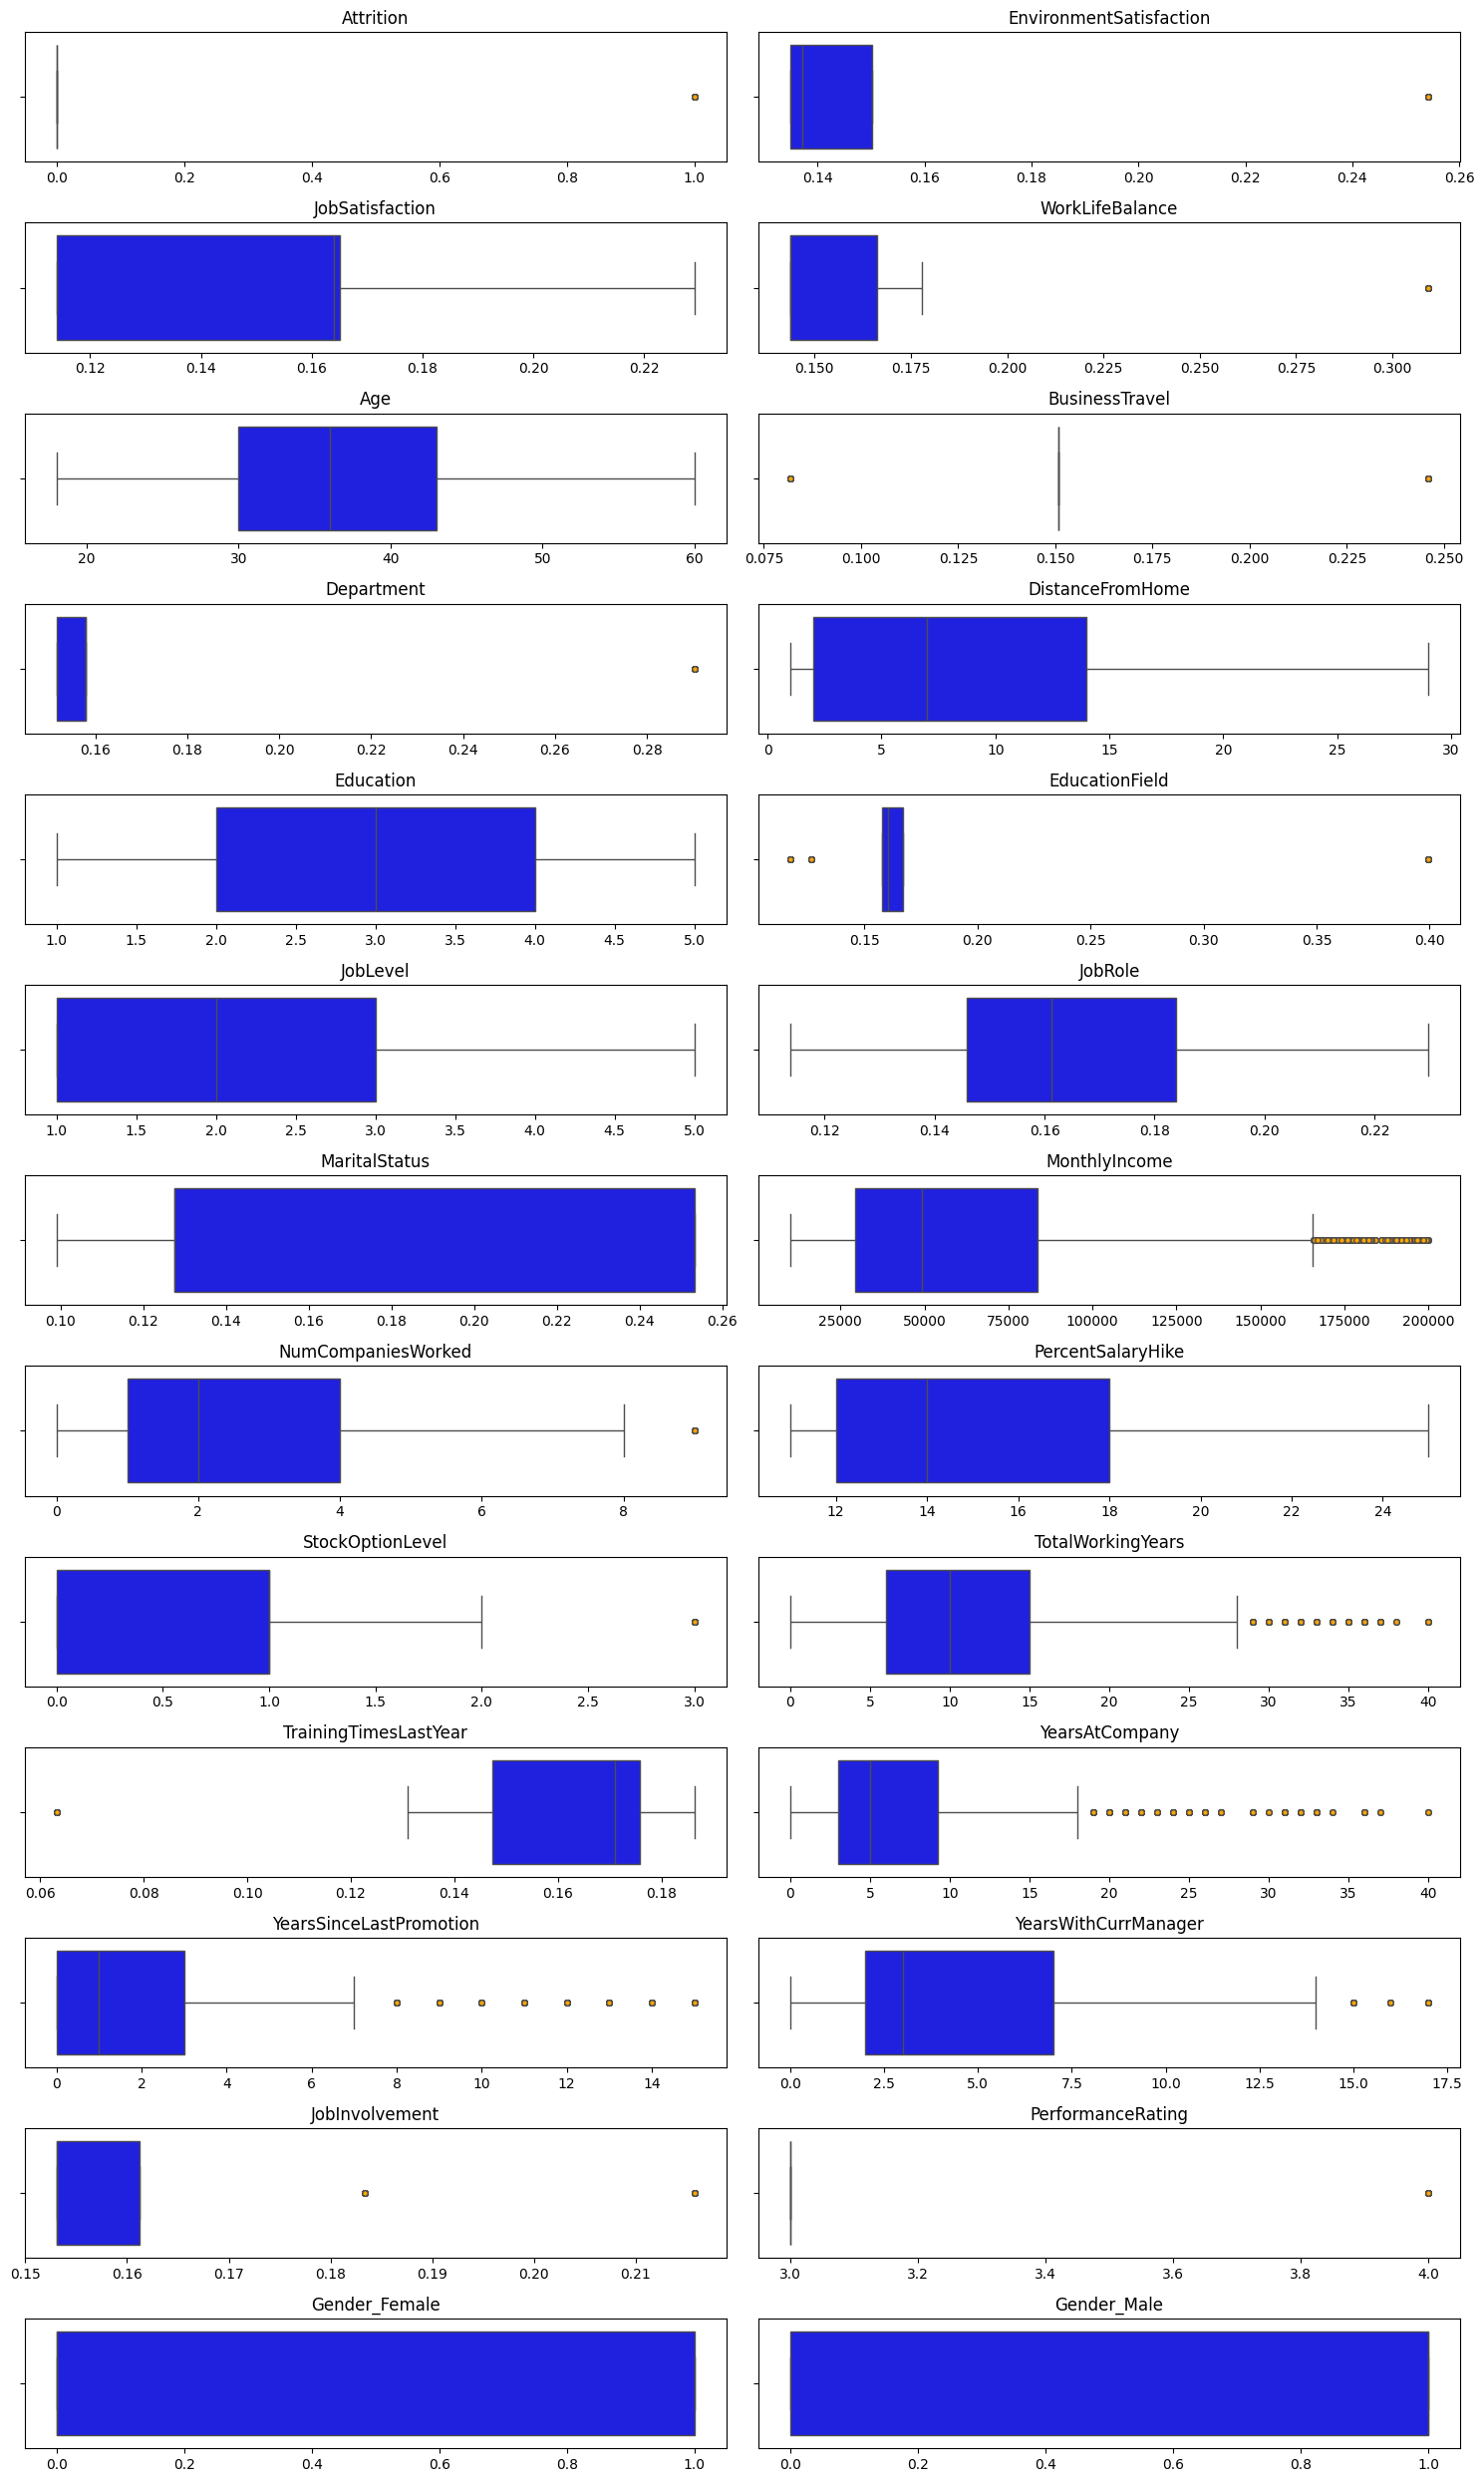

In [13]:
univariados.visualizar_outliers_univariados(tamano_grafica=(15, 25))

Después de haber hecho el encoding también estamos detectando outliers de las variables categóricas que básicamente son aquellos valores no se repiten tanto, los cuales interpreta como outliers. Por lo tanto para esas variables que eran categóricas no las vamos a tener en cuenta a la hora de detectar outliers.

Para las numéricas podemos ver cada punto que corresponte a un outlier por lo que vamos a optar por usar para gestionarlos el algoritomo IFO en multivariados.

In [14]:
multi = fo.GestionOutliersMultivariados(df)


cols =['Age', 'DistanceFromHome', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
vr = "Attrition"

contaminacion = [0.01, 0.05, 0.1]
estimadores = [10, 100, 200]


df_outliers = multi.detectar_outliers_if(cols, vr, contaminacion, estimadores, visualizar=False)

Añadimos una columna para ver el porcentaje de los outliers obtenidos

In [15]:
df_outliers["porcentaje_outliers"] = df_outliers.filter(like="outliers").apply(lambda x: round(sum(x==-1)/len(x),2), axis=1)
df_outliers

,Attrition,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,Gender_Female,Gender_Male,outliers_ifo_0.01_10,outliers_ifo_0.01_100,outliers_ifo_0.01_200,outliers_ifo_0.05_10,outliers_ifo_0.05_100,outliers_ifo_0.05_200,outliers_ifo_0.1_10,outliers_ifo_0.1_100,outliers_ifo_0.1_200,porcentaje_outliers
0,0,0.137225,0.113943,0.166169,51,0.150770,0.151492,6,2,0.167044,1,0.145889,0.127476,131160,1.0,11,0,1.0,0.063158,1,0,0,0.153057,3,1.0,0.0,1,1,1,1,1,1,1,1,1,0.0
1,1,0.137225,0.164034,0.177778,31,0.245983,0.157820,10,1,0.167044,1,0.183935,0.253256,41890,0.0,23,1,6.0,0.175817,5,1,4,0.161232,4,1.0,0.0,1,1,1,1,1,1,1,1,1,0.0
2,0,0.150179,0.164034,0.309322,32,0.245983,0.157820,17,4,0.126582,4,0.169456,0.127476,193280,1.0,15,3,5.0,0.171053,5,0,3,0.153057,3,0.0,1.0,1,1,1,1,1,1,1,1,1,0.0
3,0,0.134909,0.113943,0.143733,38,0.081818,0.157820,2,5,0.167044,3,0.136364,0.127476,83210,3.0,11,3,13.0,0.147399,8,7,5,0.161232,3,0.0,1.0,1,1,1,1,1,1,1,1,1,0.0
4,0,0.134909,0.229044,0.143733,32,0.150770,0.157820,10,1,0.160557,1,0.169456,0.253256,23420,4.0,12,2,9.0,0.171053,6,0,4,0.153057,3,0.0,1.0,1,1,1,1,1,1,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,0,0.137225,0.113943,0.143733,29,0.150770,0.151492,4,3,0.126582,2,0.136364,0.253256,35390,1.0,18,0,6.0,0.171053,6,1,5,0.161232,3,1.0,0.0,1,1,1,1,1,1,1,1,1,0.0
4296,0,0.134909,0.229044,0.143733,42,0.150770,0.157820,5,4,0.160557,1,0.183935,0.253256,60290,3.0,17,1,10.0,0.147399,3,0,2,0.153057,3,1.0,0.0,1,1,1,1,1,1,1,1,1,0.0
4297,0,0.134909,0.113943,0.143733,29,0.150770,0.157820,2,4,0.160557,1,0.161162,0.099052,26790,2.0,15,0,10.0,0.171053,3,0,2,0.161232,3,0.0,1.0,1,1,1,1,1,1,1,1,1,0.0
4298,0,0.254217,0.165123,0.143733,25,0.150770,0.157820,25,2,0.167044,2,0.169456,0.127476,37020,0.0,20,0,5.0,0.130919,4,1,2,0.153057,4,0.0,1.0,1,1,1,1,1,1,1,1,1,0.0


In [27]:
porcentaje = 0.6
df_outliers_porcentaje = df_outliers[df_outliers["porcentaje_outliers"]>porcentaje]
df_restante = df_outliers[df_outliers["porcentaje_outliers"]<porcentaje]

print(f"Tenemos un {round(df_outliers_porcentaje.shape[0]/df_outliers.shape[0]*100, 2)}% de outliers respecto al total de los datos.")

Tenemos un 3.07% de outliers respecto al total de los datos.


Como primera aproximación vmos a probar a quitar estos outliers y quedarnos con el resto del dataframe, en próximas iteraciones podemos probar a mantenerlos o imputarlos.


In [38]:
df_final = df_restante.loc[:, ~df_restante.columns.str.contains("outlier")]
print(df_final.shape)
df_final.head(2)

(4168, 26)


,Attrition,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,Gender_Female,Gender_Male
0,0,0.137225,0.113943,0.166169,51,0.150770,0.151492,6,2,0.167044,1,0.145889,0.127476,131160,1.0,11,0,1.0,0.063158,1,0,0,0.153057,3,1.0,0.0
1,1,0.137225,0.164034,0.177778,31,0.245983,0.157820,10,1,0.167044,1,0.183935,0.253256,41890,0.0,23,1,6.0,0.175817,5,1,4,0.161232,4,1.0,0.0


In [39]:
df_final.to_pickle("../datos/dataframes/df_nonulls_encoded_outliers.pkl")